In [ ]:
# version necesaria de numpy 2.2.4 para modelo bayesiano, instalar y reiniciar kermel
pip instal numpy==2.2.4

SyntaxError: invalid syntax (1623008594.py, line 2)

In [3]:
import numpy as np
print(np.__version__)

2.2.4


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [5]:
# Cargar los datos desde el archivo CSV
file_path = "../data/raw/Tablas_Unidas.csv"
df = pd.read_csv(file_path, sep=',')

# Convertir la columna ID_Date a formato de fecha (YYYY-MM-DD)
df['ID_Date'] = pd.to_datetime(df['ID_Date'], format='%Y%m').dt.strftime('%Y-%m-%d')

df.set_index('ID_Date', inplace=True)

# Columnas a limpiar (ejemplo)
columnas_numericas = ['CINE', 'EXTERIOR', 'INTERNET', 'PRENSA', 'RADIO', 'REVISTAS', 
                      'PlataformasVideo', 'VARIOS', 'Sales', 'Ticket_medio', 'INV_Total', "PRODUCCION"]

for col in columnas_numericas:
    if df[col].dtype == object:  # Si es texto (por las comas)
        df[col] = df[col].str.replace(',', '.').astype(float)  # Convertir a float


# Mostrar el DataFrame
df.head(5)

,Unique_visitors,PDFBrochuresDownloaded,ProductConfigurator,Product_configurator_Visists,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,OtherReferrer,...,CINE,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,REVISTAS,PlataformasVideo,VARIOS,INV_Total
ID_Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,272382,4838,33222,94248,1415,65373,25,167199,63649,39808,...,59887.84,8200.00,133666.43,0.0,6050.0,2426.40,18013.50,338824.94,7531.03,574600.14
2022-02-01,352581,5823,38570,109531,546,77209,26,176733,124861,45543,...,72291.56,94627.51,189275.94,10000.0,6700.0,0.00,49110.91,487537.14,6972.02,916515.08
2022-03-01,332955,4845,33956,97805,5444,83178,341,173514,104132,43583,...,55000.00,0.00,214037.62,4500.0,3700.0,0.00,0.00,75000.00,15284.85,367522.47
2022-04-01,282169,3711,45949,90689,1184,69335,162,162805,74044,39650,...,10883.30,0.00,194816.97,48800.0,21550.0,1140.00,40876.00,610865.89,12255.75,941187.91
2022-05-01,261829,9037,48685,92069,8648,70972,210,156011,44196,40472,...,74333.20,0.00,130795.16,11000.0,4900.0,102851.86,20775.75,393807.74,7926.46,746390.17


In [6]:
# Lista de columnas relevantes
# Estas son las columnas que nos vamos a quedar:
# - La columna de fecha (ID_Date)
# - Las columnas de cómo accede la gente a la página web (SocialNetworks, DirectTraffic, EMail, NaturalSearch, OnlineMedia, OtherReferrer, PaidSearch)
# - Las columnas de inversión (CINE, EXTERIOR, INTERNET, PRENSA, PRODUCCION, RADIO, REVISTAS, PlataformasVideo, VARIOS, INV_Total)
# - Las columnas relacionadas con fechas (Dias_mes, Dia_inicio_mes, Dia_findemes, working_days, Dias_fines_semana, Easterweek)
cols_to_keep = [
     "Unique_visitors", "Visit_Store", "Sales", "SocialNetworks", "DirectTraffic", "EMail",
    "NaturalSearch", "OnlineMedia", "OtherReferrer", "PaidSearch", "CINE", "EXTERIOR", "INTERNET", "PRENSA", "PRODUCCION", "RADIO",
    "REVISTAS", "PlataformasVideo", "VARIOS", "INV_Total", "Dias_mes", "Dia_inicio_mes", "Dia_findemes", "working_days",
    "Dias_fines_semana", "Easterweek"
]

# Filtrado total
filtered_df = df[cols_to_keep]

# Mostrar todas las columnas completas (sin "...")
pd.set_option('display.max_columns', None)


filtered_df.head()

,Unique_visitors,Visit_Store,Sales,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,OtherReferrer,PaidSearch,CINE,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,REVISTAS,PlataformasVideo,VARIOS,INV_Total,Dias_mes,Dia_inicio_mes,Dia_findemes,working_days,Dias_fines_semana,Easterweek
ID_Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,272382,5516,1299,1415,65373,25,167199,63649,39808,13798,59887.84,8200.00,133666.43,0.0,6050.0,2426.40,18013.50,338824.94,7531.03,574600.14,31,5,7,21,10,0
2022-02-01,352581,6769,1752,546,77209,26,176733,124861,45543,28656,72291.56,94627.51,189275.94,10000.0,6700.0,0.00,49110.91,487537.14,6972.02,916515.08,28,1,7,20,8,0
2022-03-01,332955,6249,1897,5444,83178,341,173514,104132,43583,15243,55000.00,0.00,214037.62,4500.0,3700.0,0.00,0.00,75000.00,15284.85,367522.47,31,1,3,23,8,0
2022-04-01,282169,6507,1546,1184,69335,162,162805,74044,39650,18510,10883.30,0.00,194816.97,48800.0,21550.0,1140.00,40876.00,610865.89,12255.75,941187.91,30,4,5,22,8,1
2022-05-01,261829,7183,1784,8648,70972,210,156011,44196,40472,20031,74333.20,0.00,130795.16,11000.0,4900.0,102851.86,20775.75,393807.74,7926.46,746390.17,31,6,1,21,10,0


C:\Users\josit\AppData\Local\Temp\ipykernel_27604\2186284899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['INV_Total'] = filtered_df['INV_Total'].round().astype(int)  # Redondear a enteros


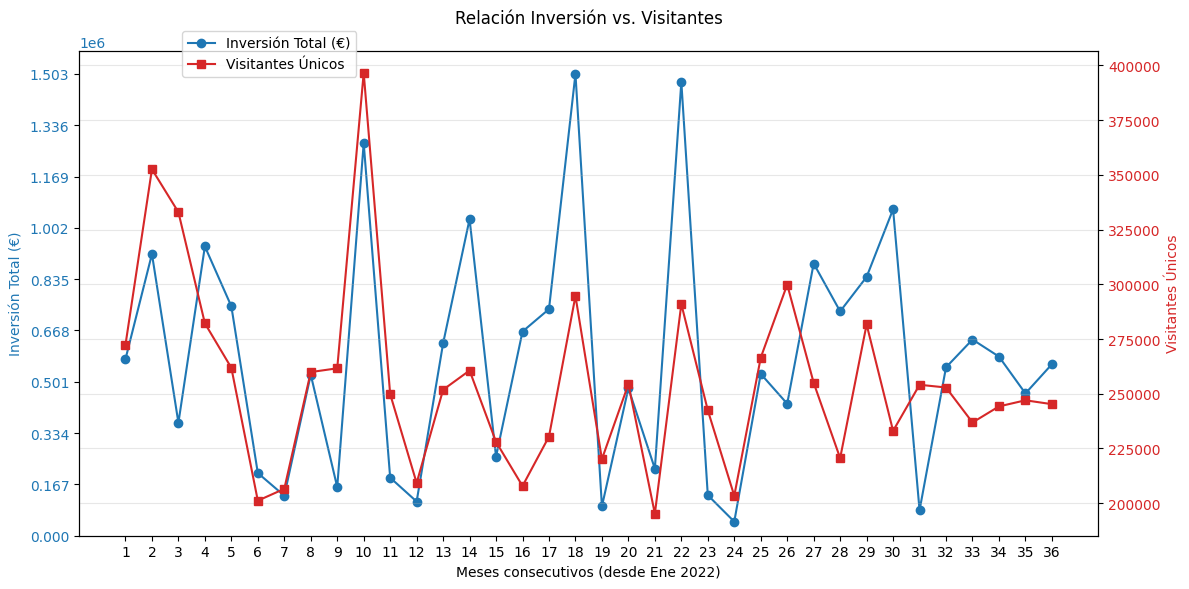

In [7]:
# Preparación de datos
filtered_df['INV_Total'] = filtered_df['INV_Total'].round().astype(int)  # Redondear a enteros
meses = range(1, len(filtered_df) + 1)  # Índice numérico 1, 2, 3...

# Configuración del gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Eje Izquierdo (Inversión Total) ---
ax1.plot(meses, filtered_df['INV_Total'], 
         color='tab:blue', marker='o', label='Inversión Total (€)')

# Configuración del eje Y izquierdo
max_inversion = filtered_df['INV_Total'].max()
ax1.set_ylim(0, max_inversion * 1.05)  # 5% más arriba del máximo
ax1.set_yticks(np.linspace(0, max_inversion, 10))  # 10 divisiones equidistantes
ax1.set_ylabel('Inversión Total (€)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# --- Eje Derecho (Visitantes Únicos) ---
ax2 = ax1.twinx()
ax2.plot(meses, filtered_df['Unique_visitors'], 
         color='tab:red', marker='s', label='Visitantes Únicos')
ax2.set_ylabel('Visitantes Únicos', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# --- Ajustes finales ---
ax1.set_xticks(meses)
ax1.set_xticklabels([f'{i}' for i in meses])
ax1.set_xlabel('Meses consecutivos (desde Ene 2022)')

plt.title('Relación Inversión vs. Visitantes', pad=20)
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.95))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

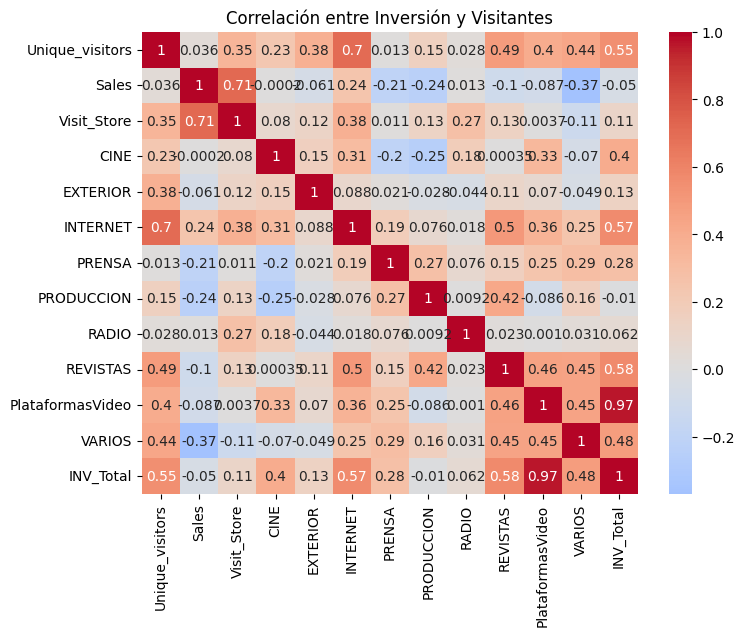

In [8]:
# Calcular matriz de correlación
corr = filtered_df[['Unique_visitors',"Sales", 'Visit_Store', "CINE","EXTERIOR","INTERNET","PRENSA","PRODUCCION","RADIO","REVISTAS","PlataformasVideo","VARIOS","INV_Total"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Inversión y Visitantes')
plt.show()

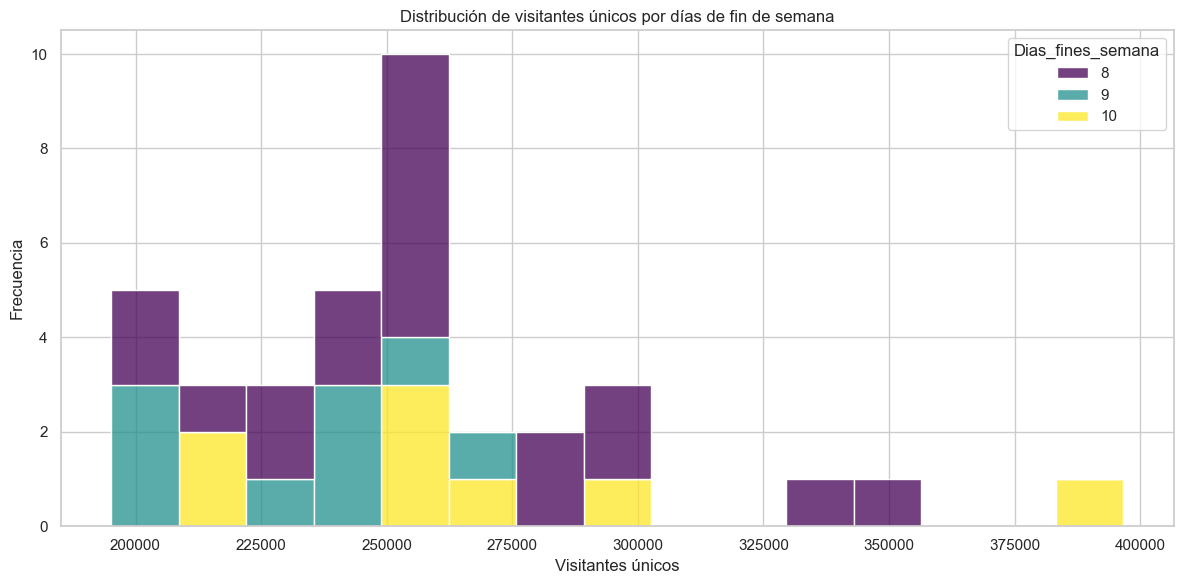

In [9]:
# Estilo
sns.set(style="whitegrid")

# Histograma agrupado por cantidad de días de fin de semana
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Unique_visitors', hue='Dias_fines_semana', bins=15, palette='viridis', multiple='stack')
plt.title('Distribución de visitantes únicos por días de fin de semana')
plt.xlabel('Visitantes únicos')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


C:\Users\josit\AppData\Local\Temp\ipykernel_27604\3927406491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='working_days', y='Unique_visitors', palette='Blues')


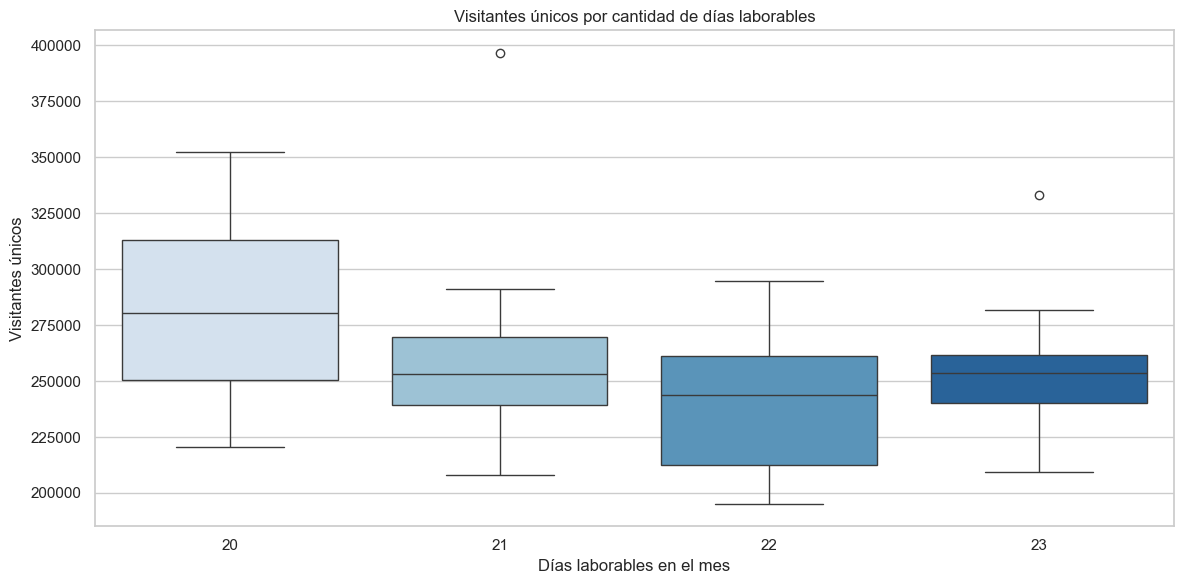

In [10]:
# Estilo
sns.set(style="whitegrid")

# Gráfico boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='working_days', y='Unique_visitors', palette='Blues')
plt.title('Visitantes únicos por cantidad de días laborables')
plt.xlabel('Días laborables en el mes')
plt.ylabel('Visitantes únicos')
plt.tight_layout()
plt.show()


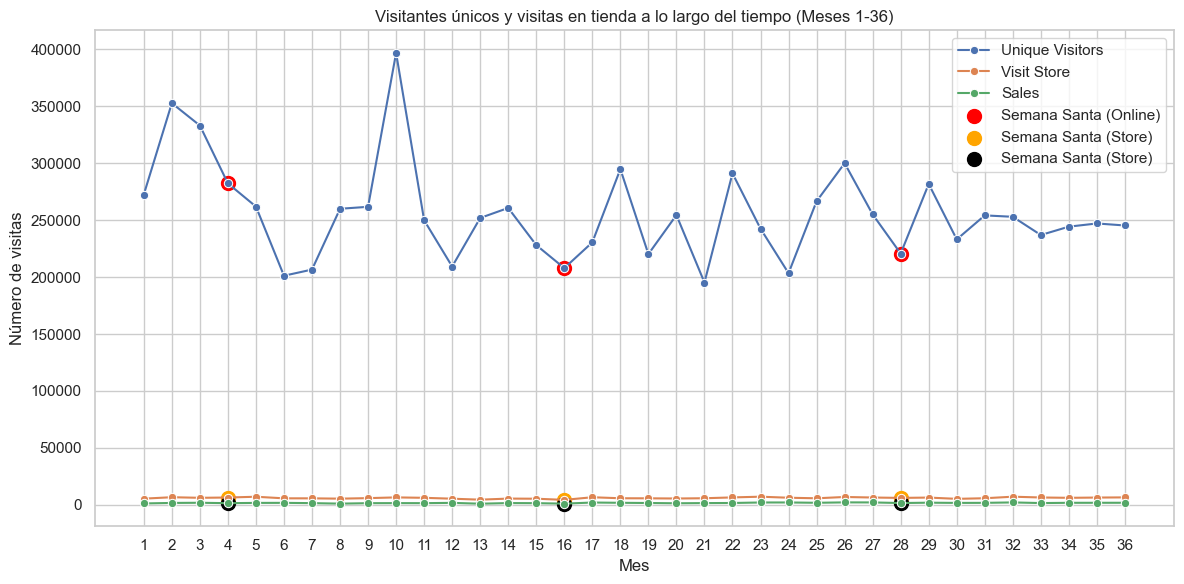

In [11]:
df['Mes_Num'] = range(1, len(df) + 1)

plt.figure(figsize=(12, 6))

# Desactivar errorbar
sns.lineplot(data=df, x='Mes_Num', y='Unique_visitors', marker='o', label='Unique Visitors', errorbar=None)
sns.lineplot(data=df, x='Mes_Num', y='Visit_Store', marker='o', label='Visit Store', errorbar=None)
sns.lineplot(data=df, x='Mes_Num', y='Sales', marker='o', label='Sales', errorbar=None)

# Colorear los puntos si es Semana Santa
easter_df = df[df['Easterweek'] == 1]
plt.scatter(easter_df['Mes_Num'], easter_df['Unique_visitors'], color='red', s=100, label='Semana Santa (Online)')
plt.scatter(easter_df['Mes_Num'], easter_df['Visit_Store'], color='orange', s=100, label='Semana Santa (Store)')
plt.scatter(easter_df['Mes_Num'], easter_df['Sales'], color='black', s=100, label='Semana Santa (Store)')

# Estética
plt.title('Visitantes únicos y visitas en tienda a lo largo del tiempo (Meses 1-36)')
plt.xlabel('Mes')
plt.ylabel('Número de visitas')
plt.legend()
plt.xticks(ticks=range(1, 37))
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

# Cargar tus datos (ya debes tener el df cargado)
# Supongamos que se llama df

# Variables predictoras (X)
X_cols = filtered_df.drop(columns=['Sales', 'Unique_visitors', 'Visit_Store']).columns.tolist()

X = df[X_cols]

In [13]:
print(X.dtypes)

SocialNetworks         int64
DirectTraffic          int64
EMail                  int64
NaturalSearch          int64
OnlineMedia            int64
OtherReferrer          int64
PaidSearch             int64
CINE                 float64
EXTERIOR             float64
INTERNET             float64
PRENSA               float64
PRODUCCION           float64
RADIO                float64
REVISTAS             float64
PlataformasVideo     float64
VARIOS               float64
INV_Total            float64
Dias_mes               int64
Dia_inicio_mes         int64
Dia_findemes           int64
working_days           int64
Dias_fines_semana      int64
Easterweek             int64
dtype: object


In [14]:

# Variables objetivo (Y)
y_col_online = ['Unique_visitors']
y_col_sales = ['Sales']
y_sales = df[y_col_sales]
y_online = df[y_col_online]


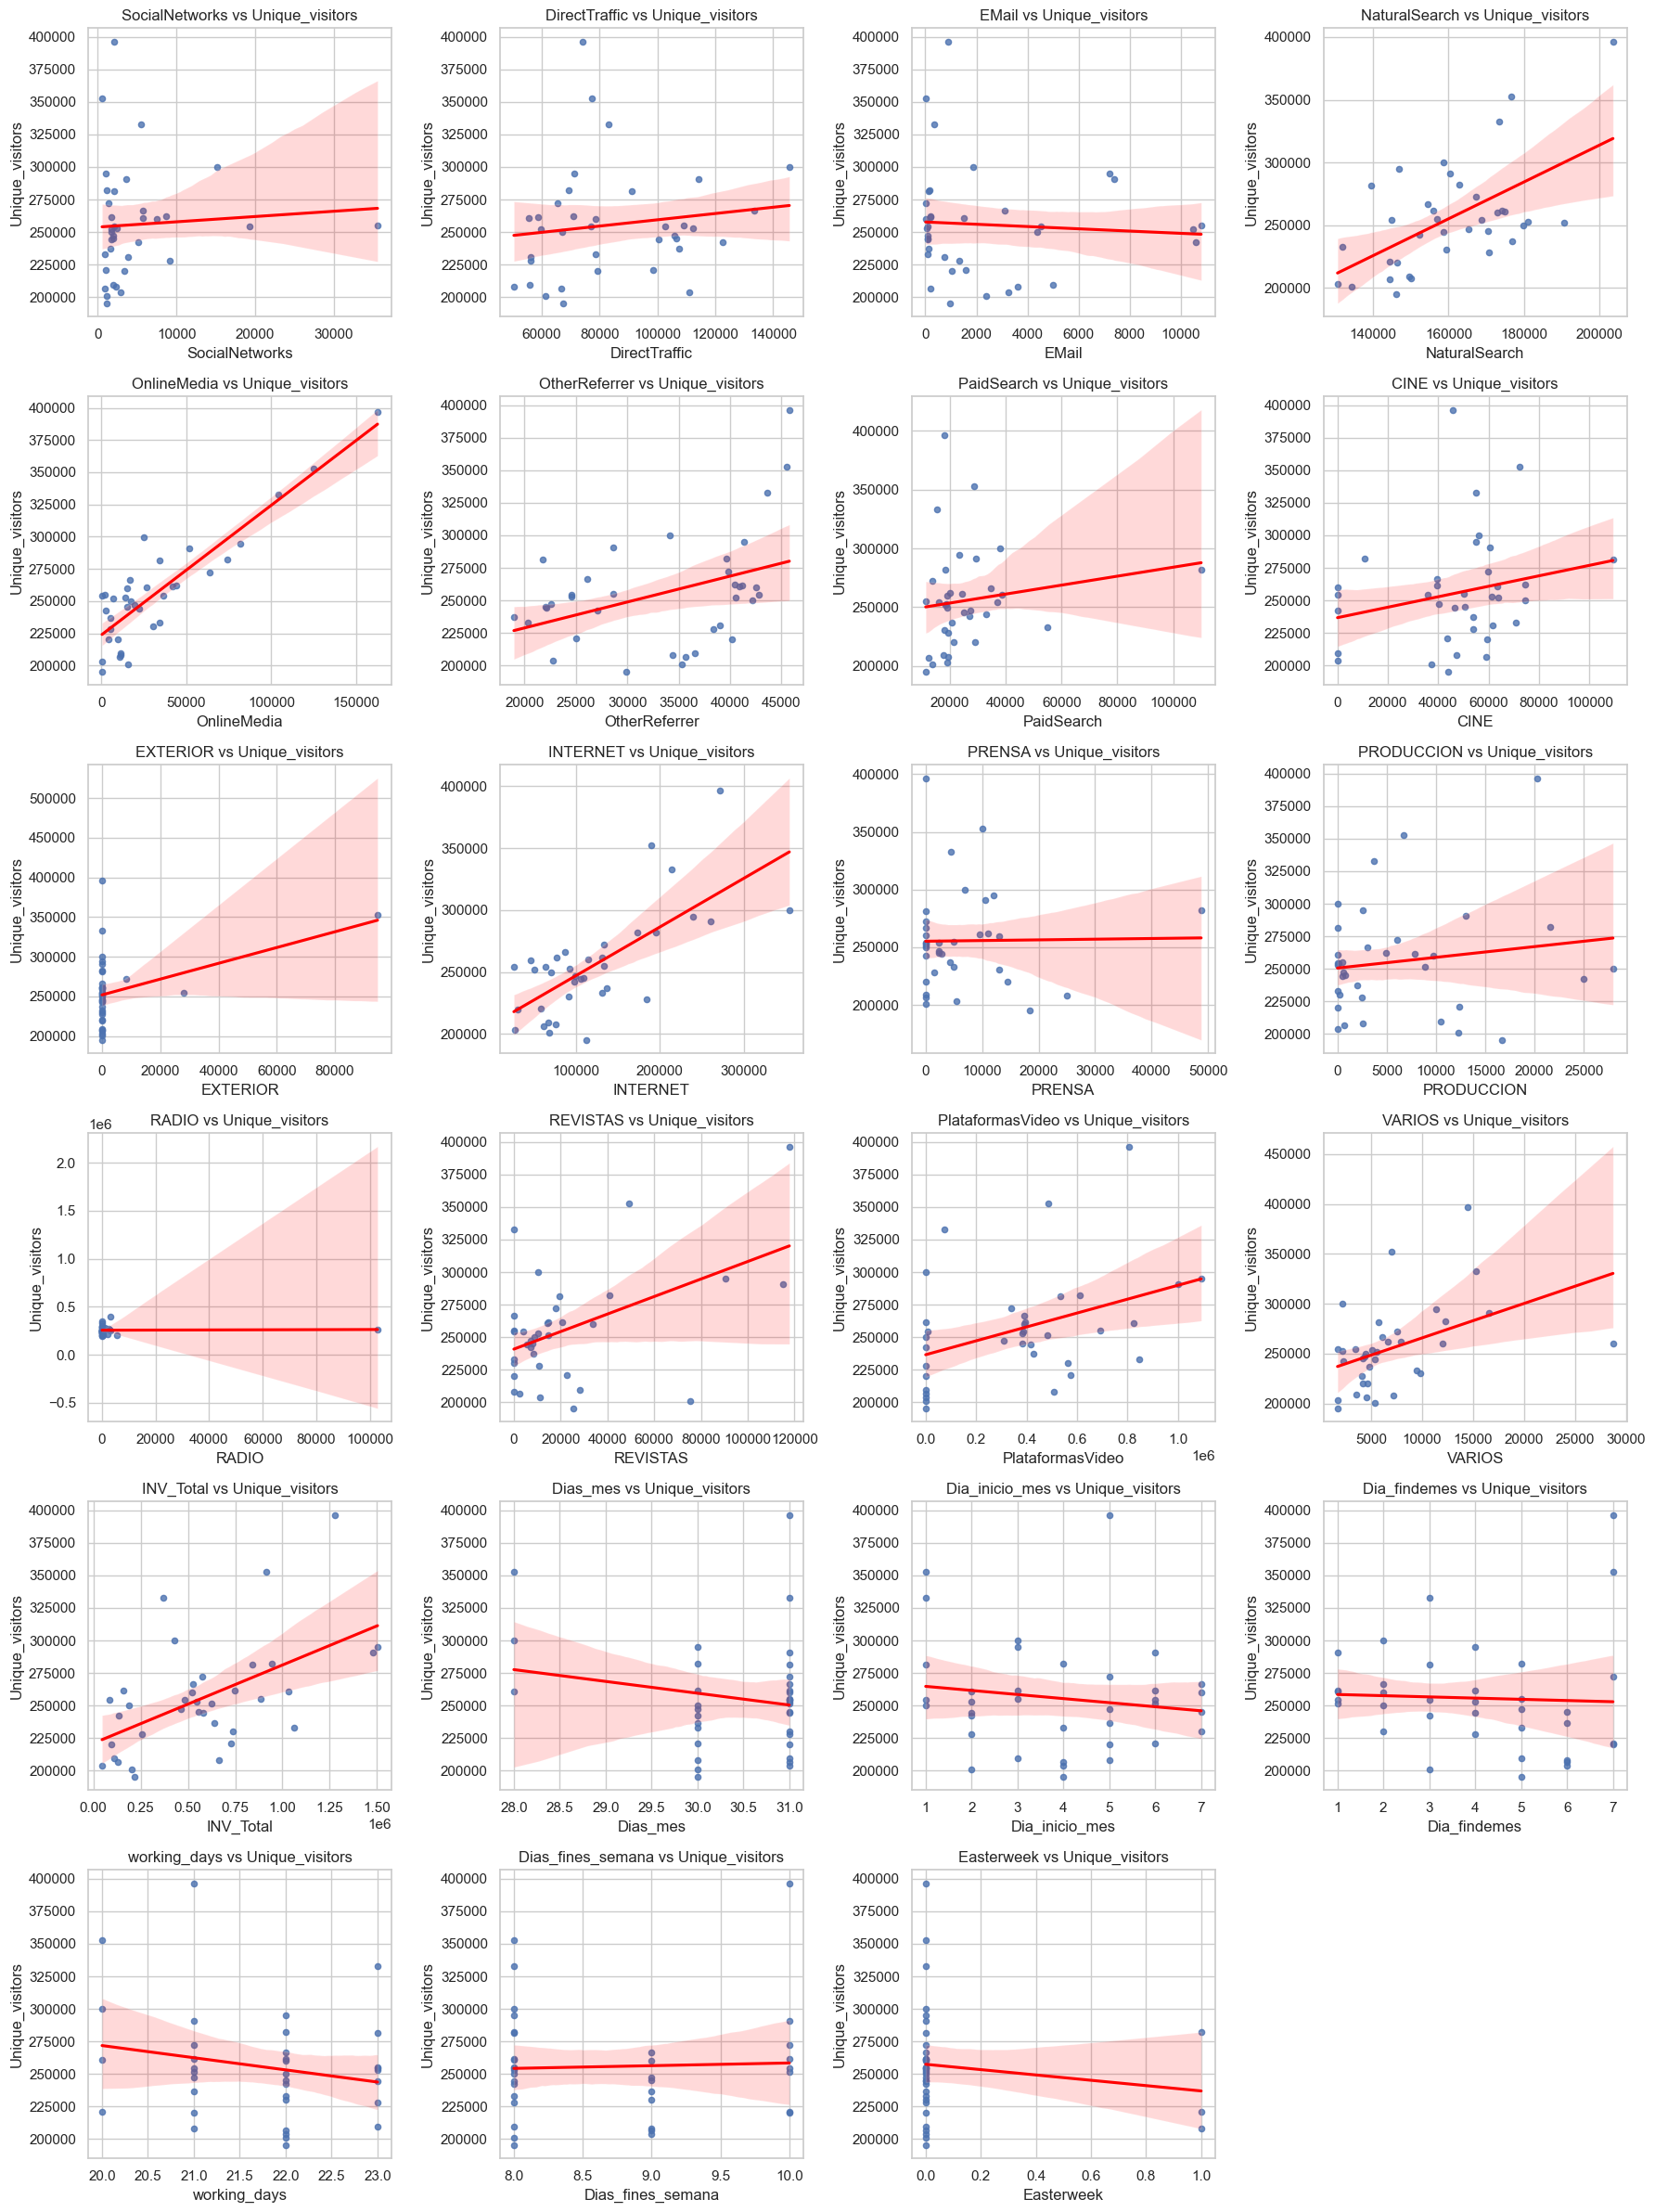

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = X.columns
n_cols = 4  # Número de columnas en la matriz
n_rows = (len(cols) + n_cols - 1) // n_cols  # Calcula cuántas filas se necesitan

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Graficar cada variable independiente contra la variable dependiente
for i, col in enumerate(cols):
    sns.regplot(data=df, x=col, y='Unique_visitors', ax=axes[i], scatter_kws={'s': 20}, line_kws={'color': 'red'})
    axes[i].set_title(f'{col} vs Unique_visitors')

# Eliminar subplots vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


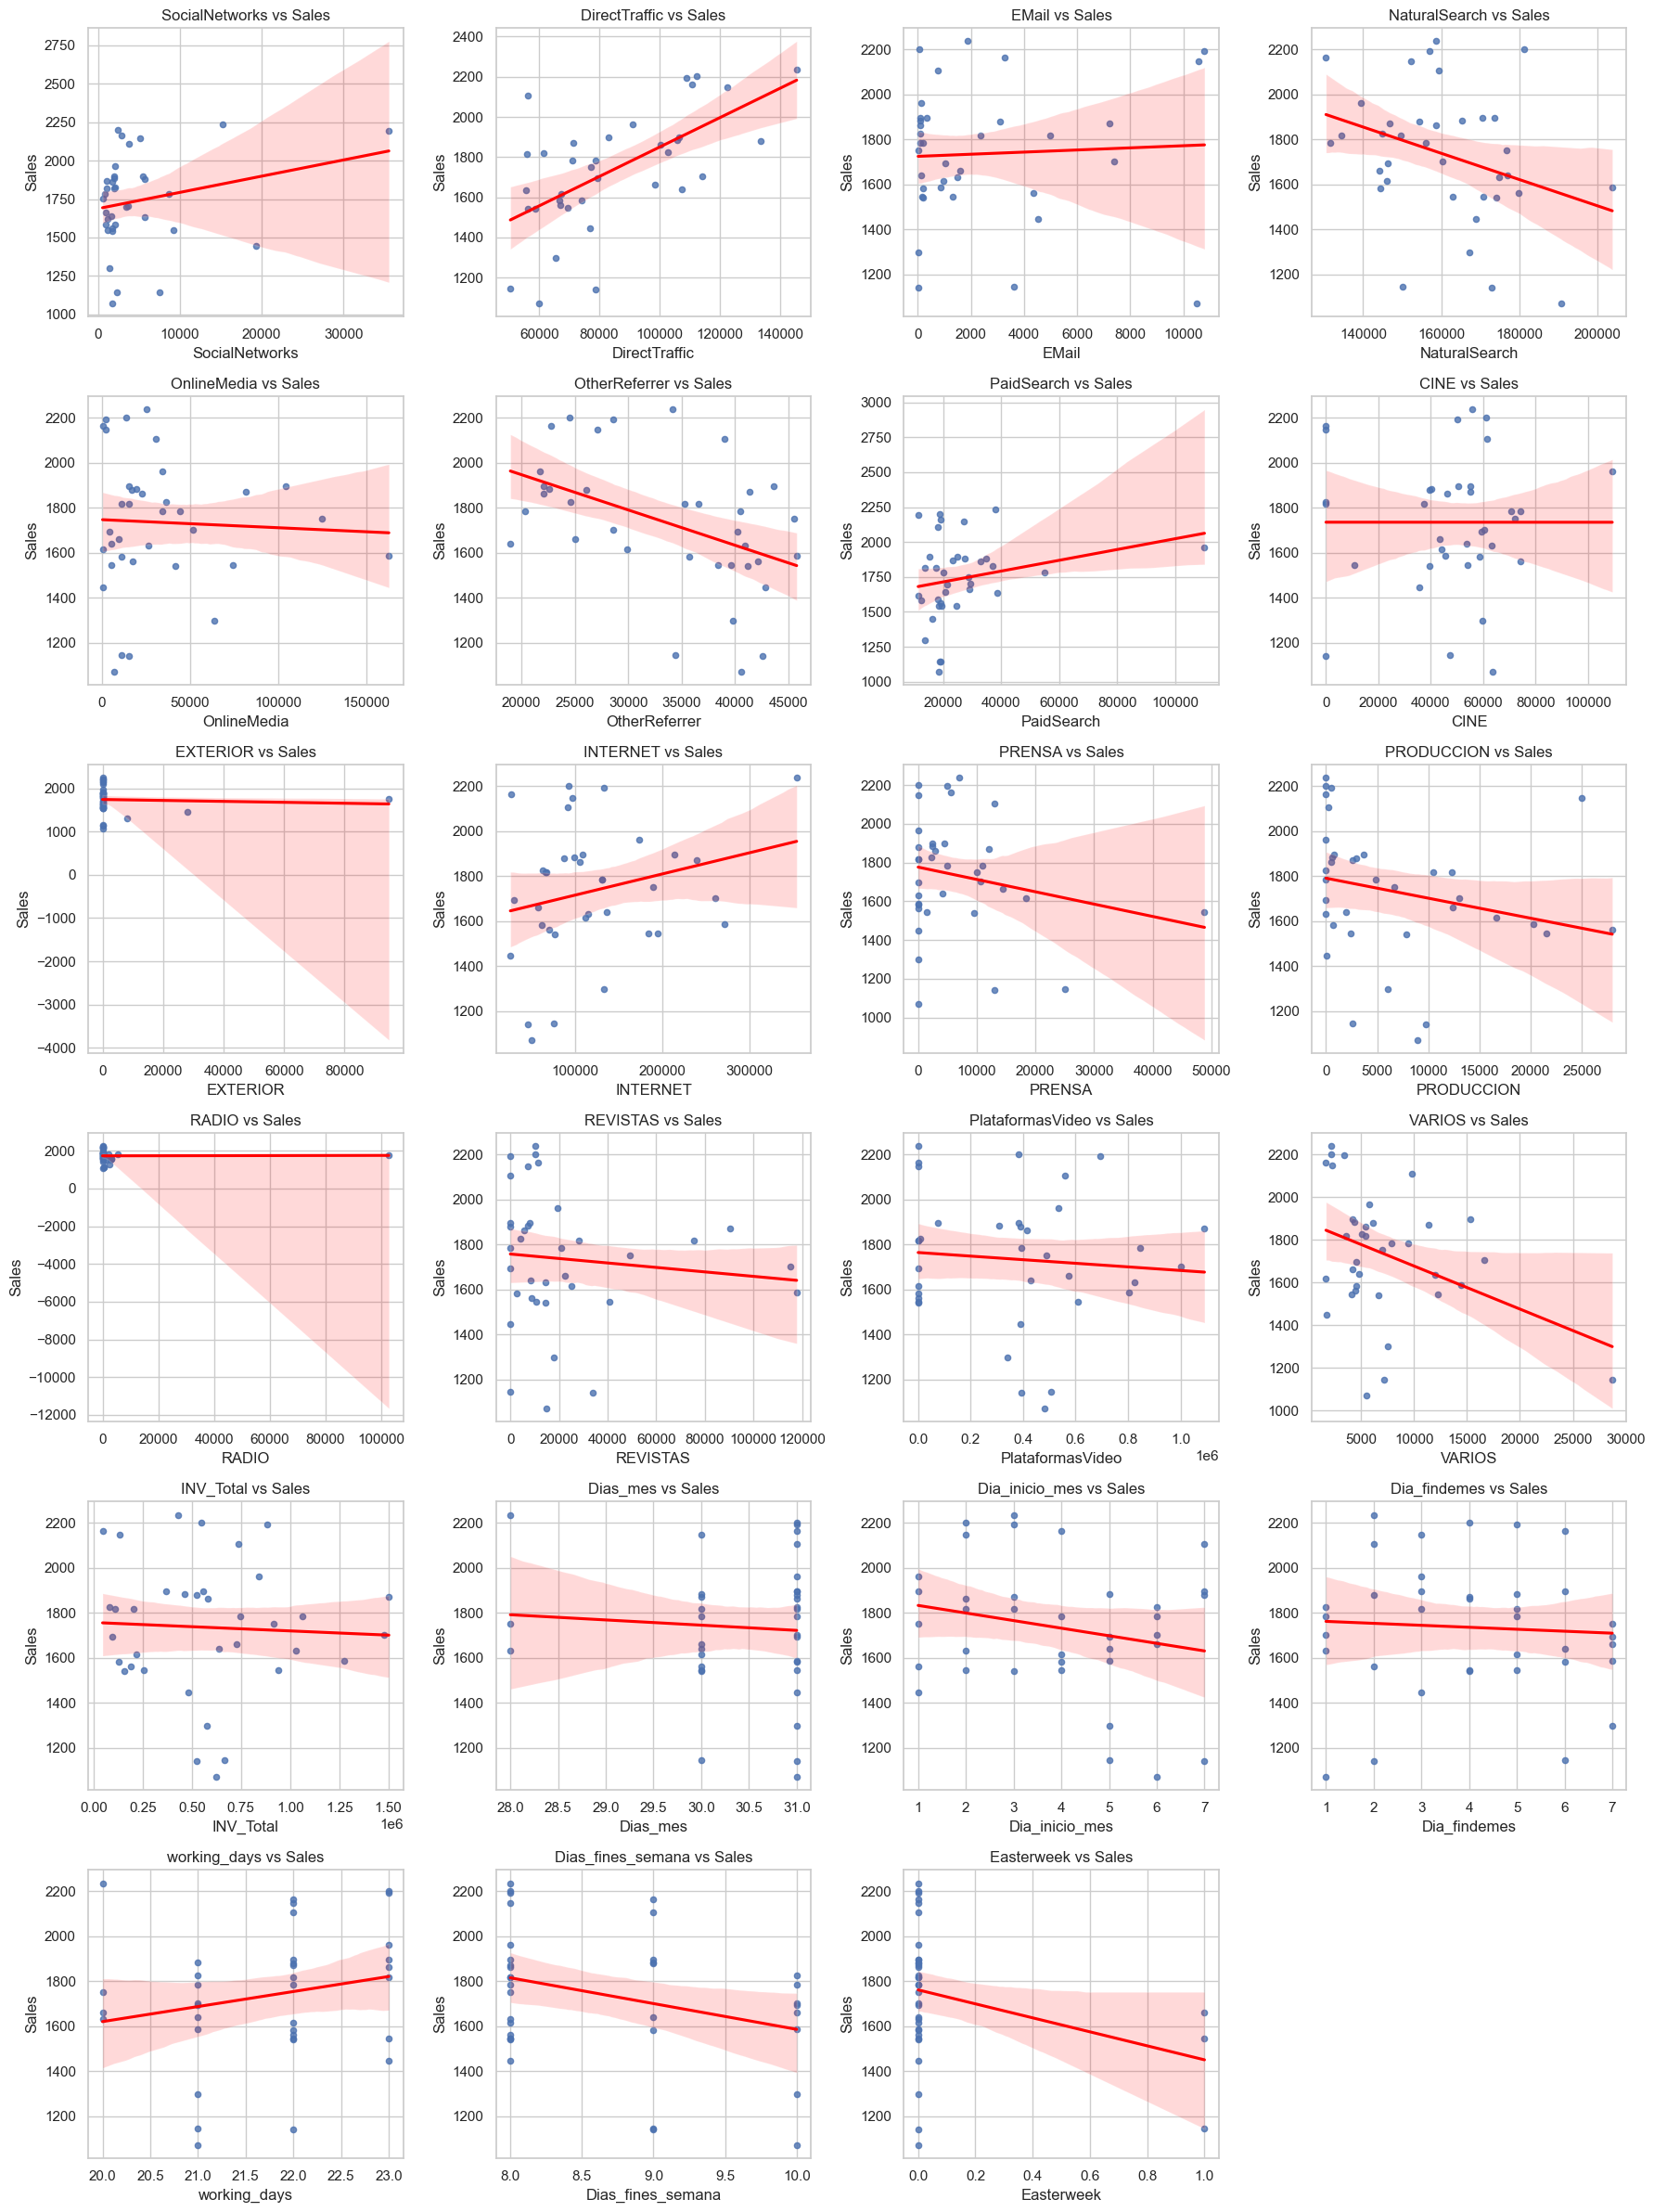

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = X.columns
n_cols = 4  # Número de columnas en la matriz
n_rows = (len(cols) + n_cols - 1) // n_cols  # Calcula cuántas filas se necesitan

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.regplot(data=df, x=col, y='Sales', ax=axes[i], scatter_kws={'s': 20}, line_kws={'color': 'red'})
    axes[i].set_title(f'{col} vs Sales')

# Eliminar subplots vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [17]:
import itertools
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Conjunto fijo de columnas predictoras
fixed_predictors = ['SocialNetworks', 'DirectTraffic', 'EMail', 'NaturalSearch', 'OtherReferrer', 'PaidSearch', 'REVISTAS', 
                    'OnlineMedia', 'Dias_fines_semana', 'PRENSA', 'PRODUCCION', 'Dias_mes', 'Dia_findemes']

# Columnas variables que se combinarán
variable_predictors = ["CINE","EXTERIOR","INTERNET","RADIO","PlataformasVideo","VARIOS","INV_Total",
                       "Dia_inicio_mes","working_days","Easterweek"]

# Variable a predecir
target = 'Unique_visitors'  # O 'Sales'

# Almacenamiento del mejor resultado
best_score = -999
best_combo = None
best_model = None

# Combinaciones de 0 a N columnas variables
for r in range(len(variable_predictors) + 1):  # Incluye combinaciones vacías
    for combo in itertools.combinations(variable_predictors, r):
        # Crear lista completa de variables para esta iteración
        full_features = fixed_predictors + list(combo)
        
        X = df[full_features].copy()
        y = df[target]

        # Comprobar que no haya NaNs
        if X.isnull().values.any() or y.isnull().values.any():
            continue

        # Escalar
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Train/Test split
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        # Modelo
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluación
        score = r2_score(y_test, y_pred)

        # Guardar si es mejor
        if score > best_score:
            best_score = score
            best_combo = full_features
            best_model = model

# Resultados
print("🔍 Mejor combinación de variables:", best_combo)
print("📈 Mejor R2 score:", round(best_score, 4))


🔍 Mejor combinación de variables: ['SocialNetworks', 'DirectTraffic', 'EMail', 'NaturalSearch', 'OtherReferrer', 'PaidSearch', 'REVISTAS', 'OnlineMedia', 'Dias_fines_semana', 'PRENSA', 'PRODUCCION', 'Dias_mes', 'Dia_findemes']
📈 Mejor R2 score: 0.9157


In [18]:
import itertools
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Conjunto fijo de columnas predictoras
fixed_predictors = ['Dias_fines_semana', 'SocialNetworks', 'OnlineMedia', 'OtherReferrer', 'PaidSearch', 'EXTERIOR', 'RADIO', 
                    'Easterweek']

# Columnas variables que se combinarán
variable_predictors = ["CINE","INTERNET","PRENSA","PRODUCCION","REVISTAS","PlataformasVideo","VARIOS","INV_Total",
                       "Dias_mes","Dia_inicio_mes","Dia_findemes","working_days",]

# Variable a predecir
target = 'Sales'  # O 'Sales'

# Almacenamiento del mejor resultado
best_score = -999
best_combo = None
best_model = None

# Combinaciones de 0 a N columnas variables
for r in range(len(variable_predictors) + 1):  # Incluye combinaciones vacías
    for combo in itertools.combinations(variable_predictors, r):
        # Crear lista completa de variables para esta iteración
        full_features = fixed_predictors + list(combo)
        
        X = df[full_features].copy()
        y = df[target]

        # Comprobar que no haya NaNs
        if X.isnull().values.any() or y.isnull().values.any():
            continue

        # Escalar
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Train/Test split
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        # Modelo
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluación
        score = r2_score(y_test, y_pred)

        # Guardar si es mejor
        if score > best_score:
            best_score = score
            best_combo = full_features
            best_model = model

# Resultados
print("🔍 Mejor combinación de variables:", best_combo)
print("📈 Mejor R2 score:", round(best_score, 4))


🔍 Mejor combinación de variables: ['Dias_fines_semana', 'SocialNetworks', 'OnlineMedia', 'OtherReferrer', 'PaidSearch', 'EXTERIOR', 'RADIO', 'Easterweek']
📈 Mejor R2 score: 0.5501


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selección de variables predictoras según la matriz de correlación
predictors_online = ['SocialNetworks', 'DirectTraffic', 'EMail', 'NaturalSearch', 'OtherReferrer', 'PaidSearch', 'REVISTAS', 'OnlineMedia', 'Dias_fines_semana', 'PRENSA', 'PRODUCCION', 'Dias_mes', 'Dia_findemes']
predictors_offline = ['Dias_fines_semana', 'SocialNetworks', 'OnlineMedia', 'OtherReferrer', 'PaidSearch', 'EXTERIOR', 'RADIO', 'Easterweek',]

# Variables objetivo
y_online = filtered_df['Unique_visitors']
y_offline = filtered_df['Sales']

# Preparar conjuntos X para cada modelo
X_online = filtered_df[predictors_online]
X_offline = filtered_df[predictors_offline]

# Dividir en entrenamiento y prueba
X_train_online, X_test_online, y_train_online, y_test_online = train_test_split(X_online, y_online, test_size=0.2, random_state=42)
X_train_offline, X_test_offline, y_train_offline, y_test_offline = train_test_split(X_offline, y_offline, test_size=0.2, random_state=42)

# Modelos de regresión lineal
model_online = LinearRegression().fit(X_train_online, y_train_online)
model_offline = LinearRegression().fit(X_train_offline, y_train_offline)

# Predicciones
y_pred_online = model_online.predict(X_test_online)
y_pred_offline = model_offline.predict(X_test_offline)

# Métricas
mse_online = mean_squared_error(y_test_online, y_pred_online)
r2_online = r2_score(y_test_online, y_pred_online)

mse_offline = mean_squared_error(y_test_offline, y_pred_offline)
r2_offline = r2_score(y_test_offline, y_pred_offline)

print(f"📊 Online - MSE: {mse_online:.2f}, R²: {r2_online:.2f}")
print(f"🏬 Offline - MSE: {mse_offline:.2f}, R²: {r2_offline:.2f}")

# Coeficientes
coef_online_df = pd.DataFrame({'Canal': predictors_online, 'Impacto en Visitas Online': model_online.coef_})
coef_offline_df = pd.DataFrame({'Canal': predictors_offline, 'Impacto en Visitas Offline': model_offline.coef_})



📊 Online - MSE: 21504643.60, R²: 0.92
🏬 Offline - MSE: 55230.13, R²: 0.55


In [43]:
print("Impacto en Visitas Offline:")
coef_offline_df

Impacto en Visitas Offline:


,Canal,Impacto en Visitas Offline
0,Dias_fines_semana,-101.094301
1,SocialNetworks,0.011374
2,OnlineMedia,0.002640
3,OtherReferrer,-0.021925
4,PaidSearch,-0.000465
5,EXTERIOR,-0.000748
6,RADIO,0.002444
7,Easterweek,-229.486951


# Análisis de Impacto de los Canales de Marketing en Ventas Offline

En este análisis, se evalúa el impacto de diversos canales de marketing sobre las **ventas offline** (ventas físicas o en tienda). Utilizando un modelo de regresión lineal, hemos identificado los coeficientes que muestran cómo cada canal influye en las ventas. Estos coeficientes nos ayudan a interpretar qué factores contribuyen más a las ventas físicas.

### Resultados para las Ventas Offline (sin estandarización)

A continuación se presentan los **coeficientes no estandarizados** para **ventas offline**:

#### **Coeficientes para Ventas Offline (sin estandarizar)**:

| Canal             | Impacto en Ventas Offline |
|-------------------|---------------------------|
| Dias_fines_semana | -101.094301               |
| SocialNetworks    | 0.011373741               |
| OnlineMedia       | 0.002640313               |
| OtherReferrer     | -0.021924856              |
| PaidSearch        | -0.000464889             |
| EXTERIOR          | -0.000748304             |
| RADIO             | 0.002444096              |
| Easterweek        | -229.486951              |

### **Interpretación de los Coeficientes**

1. **Dias_fines_semana (-101.094301)**:
   - Este coeficiente negativo indica que un aumento en los **días de fin de semana** **disminuye las ventas offline** en aproximadamente **101.09 unidades**. Esto puede sugerir que las ventas físicas son más bajas en los fines de semana, tal vez debido a la competencia con actividades personales o eventos durante esos días.
   
2. **SocialNetworks (0.011373741)**:
   - Este coeficiente positivo indica que un aumento en el tráfico proveniente de **Redes Sociales** está asociado con un pequeño aumento en las **ventas offline**. Aunque el coeficiente es bajo, puede indicar que las campañas de redes sociales tienen un leve impacto positivo en las ventas físicas.
   
3. **OnlineMedia (0.002640313)**:
   - El impacto de **Online Media** en las ventas offline es pequeño pero positivo, lo que indica que un incremento en el tráfico proveniente de **medios online** (como anuncios, redes sociales, o sitios web) contribuye de manera positiva a las ventas físicas, aunque de forma modesta.

4. **OtherReferrer (-0.021924856)**:
   - Este coeficiente negativo indica que un aumento en el tráfico de **Other Referrers** (fuentes de referencia externas no especificadas) está asociado con una pequeña **reducción de las ventas offline**. Esto podría sugerir que las fuentes de referencia no relacionadas con marketing directo o estrategias promocionales no tienen un impacto positivo en las ventas físicas.

5. **PaidSearch (-0.000464889)**:
   - El coeficiente negativo es muy pequeño, lo que indica que **Paid Search** tiene un impacto mínimo, casi nulo, en las ventas offline. Esto puede sugerir que las campañas pagadas de búsqueda no están contribuyendo significativamente a las ventas físicas.

6. **EXTERIOR (-0.000748304)**:
   - Similar a PaidSearch, el impacto de **EXTERIOR** es casi nulo en las ventas físicas. Esto podría indicar que el marketing fuera de línea o en otras regiones geográficas no tiene un impacto notable.

7. **RADIO (0.002444096)**:
   - El impacto de la **publicidad en radio** también es pequeño pero positivo. Aunque es modesto, este coeficiente sugiere que la publicidad en radio puede tener un ligero efecto positivo en las ventas offline.

8. **Easterweek (-229.486951)**:
   - Este coeficiente negativo grande sugiere que las **ventas offline** durante la **Semana Santa** son **mucho menores** en comparación con otras semanas. Es posible que los consumidores prefieran realizar compras online o que haya una menor afluencia a las tiendas durante este periodo.


### **Conclusión**

En el análisis realizado, se observa que **los fines de semana** tienen un **gran impacto negativo en las ventas offline**. El coeficiente negativo de **Dias_fines_semana** (-101.094301) sugiere que, a medida que se incrementan los días de fin de semana, las ventas en tienda disminuyen. Esto indica que los consumidores tienden a realizar menos compras en físico durante el fin de semana, posiblemente debido a la preferencia por otras actividades o al aumento de las compras en línea durante estos días. **Reducir la dependencia de las ventas físicas durante los fines de semana** y encontrar formas de **atraer a más clientes en esos días** puede ser clave para optimizar las ventas.

Además, **la Semana Santa** muestra una disminución considerable en las ventas físicas, con un coeficiente negativo de **-229.486951**. Este descenso en las ventas durante este periodo sugiere que las **vacaciones o las festividades** afectan negativamente las compras en tienda. Durante estas épocas de menor afluencia, **sería recomendable ser más conservadores en las inversiones en ventas físicas**, ya que la gente tiende a no comprar tanto en tienda física. **Invertir menos en estos períodos de baja afluencia** y **redirigir esos recursos hacia otros canales**, como el online, puede ser una estrategia más efectiva.

Por otro lado, los resultados sugieren que **las inversiones en PaidSearch, EXTERIOR y otras referencias externas** tienen un impacto **mínimo o casi nulo** en las **ventas físicas**. Esto sugiere que **no es tan rentable invertir en estos canales para aumentar las ventas en tienda**, y sería más efectivo redirigir esos recursos hacia canales con mayor impacto directo.

En cuanto a los canales más efectivos, **OnlineMedia**, **SocialNetworks** y **RADIO** tienen un impacto positivo en las ventas offline. El coeficiente de **OnlineMedia (0.002640313)** muestra que, aunque modesto, **un aumento en el tráfico proveniente de medios online** contribuye a un aumento en las ventas físicas, lo que indica que los consumidores que se involucran con los medios online tienden a visitar más las tiendas físicas. De igual manera, **las redes sociales** tienen un **efecto positivo**, con un coeficiente de **0.011373741**, lo que refuerza la idea de que las campañas en redes sociales ayudan a aumentar el tráfico hacia las tiendas. La **publicidad en radio** también muestra un pequeño efecto positivo, lo que sugiere que **potenciar estos canales** podría ser una estrategia efectiva.

En resumen, para **optimizar las ventas físicas**, es esencial:
- **Reducir el impacto negativo de los fines de semana y la Semana Santa**, buscando maneras de atraer más clientes durante estos periodos.
- **Ser conservadores en las inversiones físicas durante Semana Santa**, ya que las ventas tienden a disminuir.
- **Invertir menos en PaidSearch, EXTERIOR y otros canales con bajo impacto** en las ventas físicas.
- **Reforzar las inversiones en OnlineMedia, SocialNetworks y Radio**, que han demostrado tener un impacto positivo en las ventas offline.

Una estrategia más centrada en **potenciar los canales digitales** y **ajustar las inversiones durante los períodos de baja afluencia**, como los fines de semana o la Semana Santa, puede ser clave para mejorar las ventas físicas.


In [45]:
print("Impacto en Visitas Online:")
coef_online_df

Impacto en Visitas Online:


,Canal,Impacto en Visitas Online
0,SocialNetworks,0.827732
1,DirectTraffic,0.564661
2,EMail,0.740127
3,NaturalSearch,0.764799
4,OtherReferrer,1.079573
5,PaidSearch,0.590667
6,REVISTAS,0.032657
7,OnlineMedia,0.846459
8,Dias_fines_semana,-444.153312
9,PRENSA,0.082160


# **Análisis de Impacto de los Canales de Marketing en Visitas Online**

En este análisis, se evalúa el impacto de diversos canales de marketing sobre las **visitas online** (accesos a la página web). Utilizando un modelo de regresión lineal, hemos identificado los coeficientes que muestran cómo cada canal influye en las visitas online. Estos coeficientes nos ayudan a interpretar qué factores contribuyen más a las visitas a la página web.

### Resultados para las Visitas Online (sin estandarización)

A continuación se presentan los **coeficientes no estandarizados** para **visitas online**:

#### **Coeficientes para Visitas Online (sin estandarizar)**:

| Canal             | Impacto en Visitas Online |
|-------------------|---------------------------|
| SocialNetworks    | 0.827732                  |
| DirectTraffic     | 0.564661                  |
| EMail             | 0.740127                  |
| NaturalSearch     | 0.764799                  |
| OtherReferrer     | 1.079573                  |
| PaidSearch        | 0.590667                  |
| REVISTAS          | 0.032657                  |
| OnlineMedia       | 0.846459                  |
| Dias_fines_semana | -444.153312               |
| PRENSA            | 0.082160                  |
| PRODUCCION        | -0.220939                 |
| Dias_mes          | 507.927285                |
| Dia_findemes      | -485.620478               |

### **Interpretación de los Coeficientes**

1. **SocialNetworks (0.827732)**:
   - Este coeficiente positivo indica que un aumento en el tráfico proveniente de **Redes Sociales** está asociado con un **aumento significativo en las visitas online**. Las campañas de redes sociales tienen un impacto positivo en atraer a más usuarios a la página web.

2. **DirectTraffic (0.564661)**:
   - El coeficiente positivo sugiere que el tráfico directo (cuando los usuarios acceden directamente al sitio web) tiene un **efecto positivo** sobre las visitas online. Un aumento en el tráfico directo puede reflejar un mayor reconocimiento de marca o fidelización de usuarios recurrentes.

3. **EMail (0.740127)**:
   - El coeficiente positivo muestra que las campañas de **email marketing** también tienen un impacto significativo en el aumento de visitas online, lo que refuerza la importancia de utilizar el correo electrónico como herramienta de atracción de tráfico.

4. **NaturalSearch (0.764799)**:
   - Un coeficiente positivo en **NaturalSearch** indica que el tráfico orgánico proveniente de motores de búsqueda tiene un **gran impacto positivo** en las visitas online. Mejorar el posicionamiento en motores de búsqueda puede generar más accesos al sitio web.

5. **OtherReferrer (1.079573)**:
   - Este coeficiente alto y positivo sugiere que las visitas provenientes de **otras fuentes de referencia** (no especificadas) tienen un impacto muy fuerte en el tráfico web, lo que significa que ciertas asociaciones o menciones externas pueden generar una gran cantidad de visitas.

6. **PaidSearch (0.590667)**:
   - El impacto positivo de **PaidSearch** en las visitas online indica que las campañas de publicidad pagada en motores de búsqueda también son efectivas para atraer usuarios al sitio web, aunque su impacto es más moderado que el de otras fuentes como redes sociales o búsqueda orgánica.

7. **REVISTAS (0.032657)**:
   - El impacto de **REVISTAS** es muy pequeño pero positivo, lo que sugiere que las menciones en revistas o medios tradicionales tienen un efecto leve, aunque no tan significativo, en el tráfico online.

8. **OnlineMedia (0.846459)**:
   - Este coeficiente es uno de los más altos, lo que indica que un aumento en el tráfico proveniente de **medios online** (como anuncios digitales, blogs, u otros medios en línea) contribuye significativamente a las visitas a la página web.

9. **Dias_fines_semana (-444.153312)**:
   - Este coeficiente negativo sugiere que un aumento en los **días de fin de semana** está asociado con una **disminución importante de las visitas online**. Los fines de semana parecen tener un impacto negativo en las visitas al sitio web, lo cual podría ser debido a que los consumidores prefieren realizar actividades offline durante esos días o a un cambio en el comportamiento de búsqueda.

10. **PRENSA (0.082160)**:
   - El impacto de la **prensa** es muy pequeño pero positivo, indicando que las menciones en medios de comunicación tienen un efecto modesto sobre las visitas online.

11. **PRODUCCION (-0.220939)**:
   - Este coeficiente negativo muestra que un aumento en la variable **PRODUCCION** está asociado con una **reducción en las visitas online**, lo que sugiere que este canal no es tan efectivo para atraer tráfico web.

12. **Dias_mes (507.927285)**:
   - Un coeficiente extremadamente alto indica que los **días del mes** tienen un gran impacto positivo en las visitas online. Esto podría reflejar que, en ciertos períodos del mes, hay más actividad en línea, posiblemente relacionada con promociones o fechas clave.

13. **Dia_findemes (-485.620478)**:
   - Este coeficiente negativo muestra que los **últimos días del mes** tienen una disminución significativa en las visitas online, lo que podría deberse a que los consumidores ya han realizado sus compras o búsquedas al inicio del mes.

### **Conclusión**

En el análisis realizado, se observa que ciertos canales tienen un impacto positivo considerable en las **visitas online**, mientras que otros, como los **fines de semana** y ciertos periodos del mes, tienen un efecto negativo.

- **Las Redes Sociales**, **Online Media** y **el Tráfico Directo** son algunos de los canales más efectivos para aumentar las visitas a la página web. Es recomendable invertir más en estos canales, ya que muestran un impacto positivo significativo en el tráfico online.

- **Los fines de semana** parecen ser un periodo donde las visitas online disminuyen considerablemente, lo que sugiere que **las estrategias de marketing durante este tiempo deben ser más específicas** o, en algunos casos, incluso reducirse.

- **La Semana Santa** o épocas similares, reflejadas en **Dias_fines_semana**, indican una caída en el tráfico online, lo que sugiere que durante estos periodos puede ser mejor **no invertir tanto** en marketing digital y ajustar las campañas a las preferencias de los usuarios.

- **Otras fuentes de referencia** como **OtherReferrer** y **Email Marketing** también juegan un papel importante en atraer visitas online, por lo que es útil seguir potenciando estas estrategias.

En resumen, para **optimizar las visitas online**, es esencial:
- **Invertir más en canales con gran impacto positivo** como **Social Networks, Online Media, y Direct Traffic**.
- **Reducir o ajustar las inversiones durante los fines de semana**, cuando el tráfico online tiende a disminuir.
- **Ajustar las estrategias para maximizar el impacto de las fuentes de referencia** y los **canales de marketing directo**.

Una estrategia más centrada en **optimizar las campañas durante días clave** y **ajustar las inversiones en períodos de menor tráfico**, como los fines de semana o finales de mes, puede ser clave para aumentar las visitas online.


In [27]:
import matplotlib.pyplot as plt

resultados.plot.barh(x='Canal', y='Impacto_en_Ventas', 
                    title='Impacto de cada canal en ventas (Regresión Lineal)')
plt.xlabel('Incremento en visitas por € invertido')
plt.show()

NameError: name 'resultados' is not defined

# Análisis de Rentabilidad de la Inversión en Canales de Marketing para Ventas Físicas y Visitas Online

### **Análisis Comparativo y Recomendaciones**

1. **Redes Sociales y Online Media**:
   - **Impacto en Ventas Físicas**: Moderado (0.011373741 para SocialNetworks, 0.002640313 para OnlineMedia).
   - **Impacto en Visitas Online**: Alto (0.827732 para SocialNetworks, 0.846459 para OnlineMedia).
   - **Conclusión**: Invertir en **Redes Sociales** (SocialNetworks) y **Online Media** es rentable tanto para **aumentar visitas online** como para **ventas físicas**. El impacto es positivo y significativo.

2. **Email Marketing**:
   - **Impacto en Ventas Físicas**: Nulo (-).
   - **Impacto en Visitas Online**: Alto (0.740127).
   - **Conclusión**: **Email Marketing** es excelente para **aumentar visitas online**, pero **no tiene impacto en ventas físicas**.

3. **Paid Search**:
   - **Impacto en Ventas Físicas**: Mínimo (-0.000464889).
   - **Impacto en Visitas Online**: Moderado (0.590667).
   - **Conclusión**: **Paid Search** tiene un impacto **mínimo en ventas físicas**, pero **puede ser útil para generar visitas online**.

4. **Semana Santa**:
   - **Impacto en Ventas Físicas**: Muy negativo (-229.486951).
   - **Impacto en Visitas Online**: Nulo (-).

   - **Conclusión**: Durante **Semana Santa**, **ser más conservadores** en las inversiones en **ventas físicas**. Potenciar **canales online** como **Redes Sociales** y **Email Marketing** es más rentable.

5. **Fines de Semana**:
   - **Impacto en Ventas Físicas**: Negativo (-101.094301).
   - **Impacto en Visitas Online**: Muy negativo (-444.153312).
   - **Conclusión**: **Reducir inversiones** tanto en **ventas físicas** como en **visitas online** durante **fines de semana**, ya que ambos coeficientes muestran un impacto negativo.

### **Resumen Final**
- **Invertir en Redes Sociales y Online Media**: Son efectivos tanto para **aumentar visitas online** como **ventas físicas**.
- **Ser conservadores en Semana Santa**: Invertir menos en ventas físicas y potenciar canales online debido a la baja afluencia en tienda física durante este período.
- **Reevaluar Paid Search**: Es útil para **tráfico online**, pero tiene un **impacto mínimo en ventas físicas**.
- **Ajustar estrategias en fines de semana**: Reducir la inversión en estos días debido a la **baja actividad** tanto en ventas físicas (-101.094301) como en visitas online (-444.153312).
